0     13012.6
1     13162.6
2     13137.6
3     13254.0
4     12385.7
5     12929.5
6     13002.8
7     13042.7
8     13075.5
9     13095.5
10    13028.6
11    14881.3
12    71976.2
13    22193.6
14    30786.5
15    30890.1
16    12955.4
17    13076.6
18    13058.2
19    12845.7
20    12567.4
21    11860.0
22    12962.0
23    12956.8
24    12941.7
25    12901.5
26    12957.2
Name: pendiente, dtype: float64


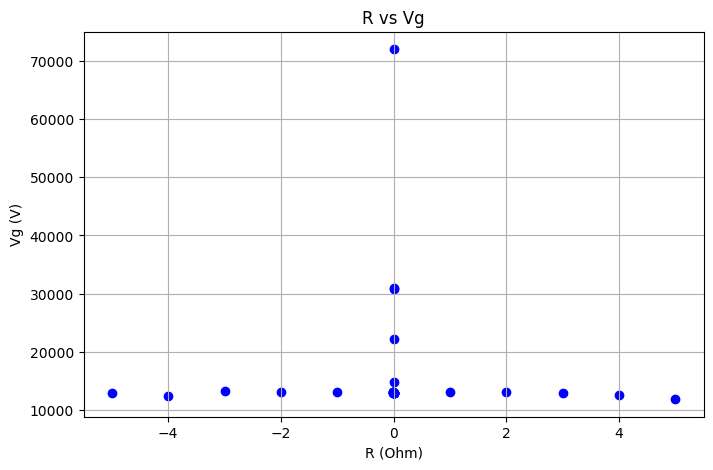

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = "Prueba.csv"
df = pd.read_csv(archivo, sep=";")

# Supongamos que df ya tiene tus datos
# Seleccionar columnas 2 y 4
x = df.iloc[:, 6]  # segunda columna
y = df.iloc[:, 1]  # cuarta columna

# Convertir a numérico por si hay strings
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
print (y)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(x, y, marker='o', linestyle='-', color='blue')
plt.xlabel('R (Ohm)')
plt.ylabel('Vg (V)')
plt.title('R vs Vg')
plt.grid(True)
plt.savefig("RvsVg.png")
plt.show()


Se encontraron 16 archivos.


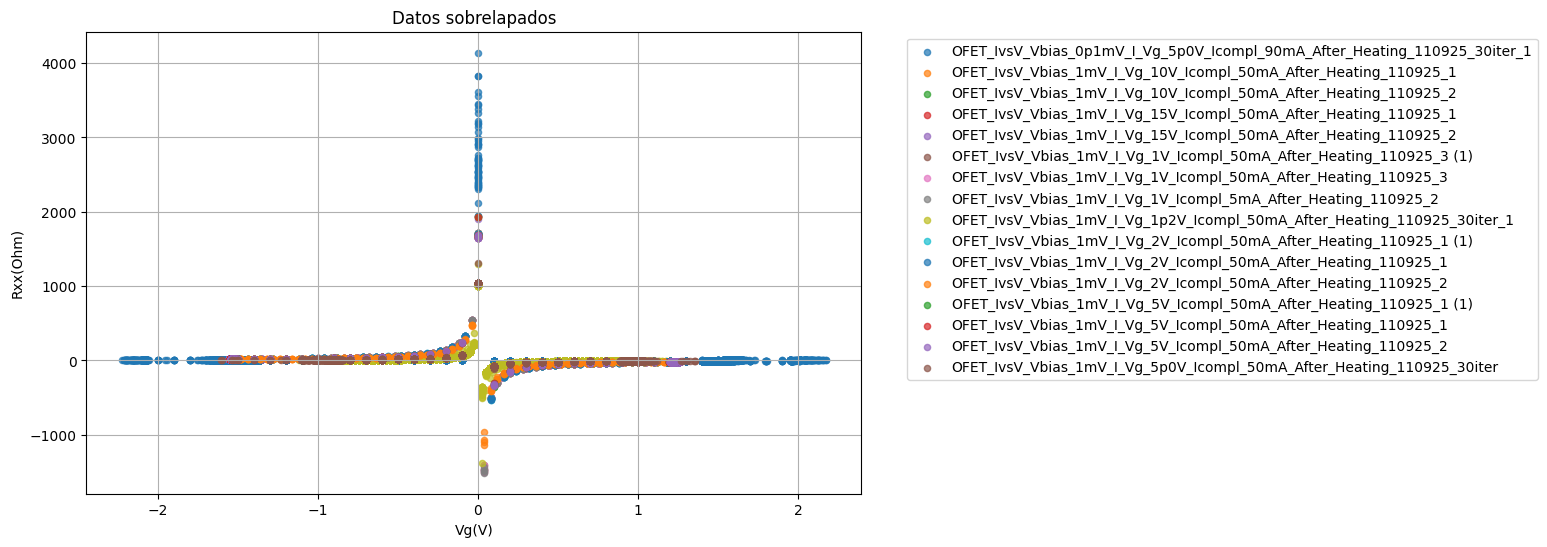


📊 Gráficas individuales guardadas en: OFET RvsVg/graficas_puntos
📊 Gráfica combinada guardada en: OFET RvsVg/graficas_puntos/puntos_combinados.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"OFET RvsVg"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas_puntos")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Colores para la gráfica combinada
colores = itertools.cycle(plt.cm.tab10.colors)

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 5 y 15 (índices 4 y 14)
        x = pd.to_numeric(df.iloc[:, 3], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 9], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 1:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        nombre_base = os.path.splitext(os.path.basename(archivo))[0]

        # === Gráfica individual ===
        plt_ind = plt.figure(figsize=(8, 6))
        plt.scatter(x, y, s=20, alpha=0.7)
        plt.xlabel("Vg(V)")
        plt.ylabel("Rxx(Ohm)")
        plt.title(f"Puntos - {nombre_base}")
        plt.grid(True)

        salida_ind = os.path.join(carpeta_salida, f"{nombre_base}_puntos.png")
        plt.savefig(salida_ind, dpi=300, bbox_inches="tight")
        plt.close(plt_ind)

        # === Agregar al combinado ===
        color = next(colores)
        plt.scatter(x, y, s=20, alpha=0.7, label=nombre_base, color=color)

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura combinada ===
plt.xlabel("Vg(V)")
plt.ylabel("Rxx(Ohm)")
plt.title("Datos sobrelapados")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "puntos_combinados.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches="tight")
plt.show()

print(f"\n📊 Gráficas individuales guardadas en: {carpeta_salida}")
print(f"📊 Gráfica combinada guardada en: {salida_combinada}")

Matplotlib is building the font cache; this may take a moment.


Se encontraron 16 archivos.


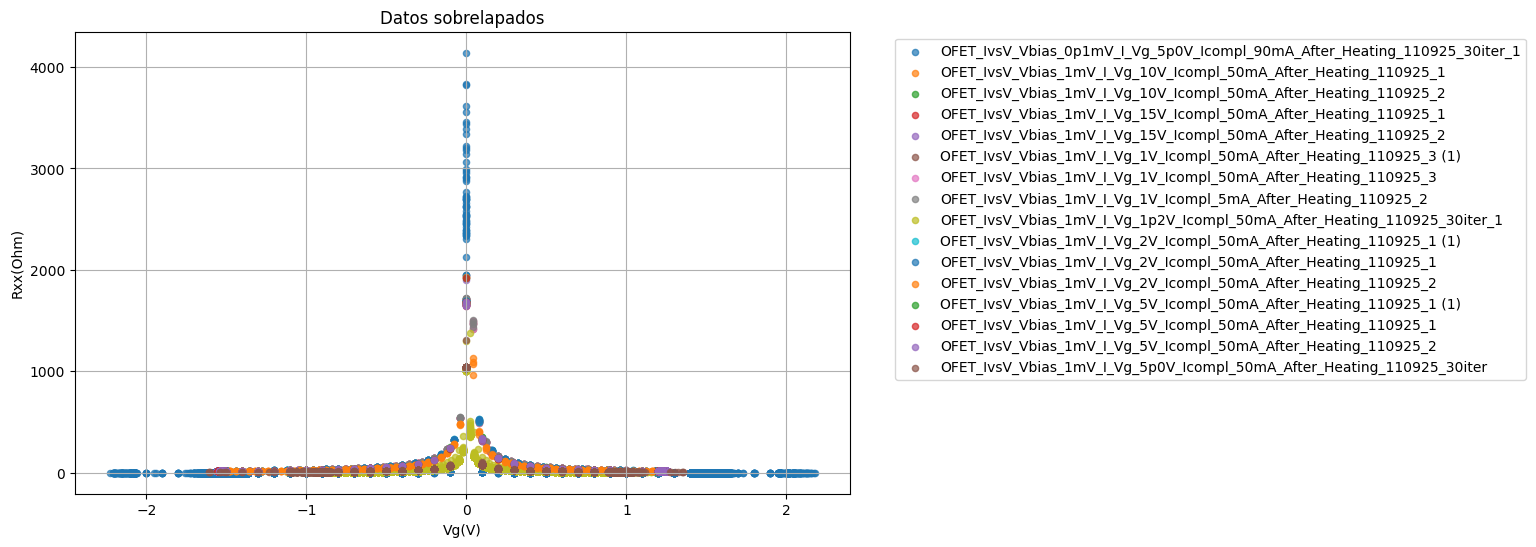


📊 Gráficas individuales guardadas en: OFET RvsVg/graficas_puntos
📊 Gráfica combinada guardada en: OFET RvsVg/graficas_puntos/puntos_combinados.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"OFET RvsVg"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas_puntos")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Colores para la gráfica combinada
colores = itertools.cycle(plt.cm.tab10.colors)

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 5 y 15 (índices 4 y 14)
        x = pd.to_numeric(df.iloc[:, 3], errors='coerce')
        y = np.abs(pd.to_numeric(df.iloc[:, 9], errors='coerce'))

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 1:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        nombre_base = os.path.splitext(os.path.basename(archivo))[0]

        # === Gráfica individual ===
        plt_ind = plt.figure(figsize=(8, 6))
        plt.scatter(x, y, s=20, alpha=0.7)
        plt.xlabel("Vg(V)")
        plt.ylabel("Rxx(Ohm)")
        plt.title(f"Puntos - {nombre_base}")
        plt.grid(True)

        salida_ind = os.path.join(carpeta_salida, f"{nombre_base}_puntos.png")
        plt.savefig(salida_ind, dpi=300, bbox_inches="tight")
        plt.close(plt_ind)

        # === Agregar al combinado ===
        color = next(colores)
        plt.scatter(x, y, s=20, alpha=0.7, label=nombre_base, color=color)

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura combinada ===
plt.xlabel("Vg(V)")
plt.ylabel("Rxx(Ohm)")
plt.title("Datos sobrelapados")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "puntos_combinados.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches="tight")
plt.show()

print(f"\n📊 Gráficas individuales guardadas en: {carpeta_salida}")
print(f"📊 Gráfica combinada guardada en: {salida_combinada}")